# HW 1：認識資料 - 91APP

## 小結

成功訂單（視相同購物車為同一訂單）高峰期分布大致如下：
1. 按月份：大部分的成功訂單量分布在四、五及十一月。
2. 按星期：星期二、三及周末的成功訂單量略高於其它日。
3. 按小時：大部分的成功訂單量分布在 21:00-0:00 之間，於 23:00 達到高峰。

--------------------------------------------------------------------------------------------------------------------------------
## Import Data

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('Ntu_Orders.csv')

In [3]:
print("Data Examination:")
print(df.shape) # Print dimensions of the summary
print("------------------------------------------")  
print(df.columns) # Print column names
print("------------------------------------------")  
print(df.index) # Print index  

Data Examination:
(2268348, 27)
------------------------------------------
Index(['SalesOrderSlaveId', 'DateId', 'MemberId', 'TradesOrderSlaveId',
       'ShopId', 'SalePageId', 'TradesOrderGroupCode', 'TrackSourceTypeDef',
       'TrackChannelTypeDef', 'TrackDeviceTypeDef', 'LevelOneCategoryName',
       'LevelTwoCategoryName', 'LevelThreeCategoryName',
       'LevelFourCategoryName', 'IsMajor', 'IsGift', 'Quantity', 'UnitPrice',
       'PromotionDiscount', 'EcouponDiscount', 'SalesOrderSlaveTotalPayment',
       'SalesOrderSlaveDateTime', 'SalesOrderSlaveStatusDef',
       'PayProfileTypeDef', 'ShippingProfileTypeDef', 'EcouponId',
       'IsSalePageGift'],
      dtype='object')
------------------------------------------
RangeIndex(start=0, stop=2268348, step=1)


In [4]:
df.head(3) # Print head of df

,SalesOrderSlaveId,DateId,MemberId,TradesOrderSlaveId,ShopId,SalePageId,TradesOrderGroupCode,TrackSourceTypeDef,TrackChannelTypeDef,TrackDeviceTypeDef,...,UnitPrice,PromotionDiscount,EcouponDiscount,SalesOrderSlaveTotalPayment,SalesOrderSlaveDateTime,SalesOrderSlaveStatusDef,PayProfileTypeDef,ShippingProfileTypeDef,EcouponId,IsSalePageGift
0,26914456,20170103,48D5DE26-236E-4854-8474-B0DCEAFF4F42,26971960,1317,9804,b'q\x14\xa49\xaa\\\xecs\xff6wH\xfbXd\x93\xfbf\...,Web,Brand,Mobile,...,399.0,-25.0,0.0,374.0,2017-01-03 23:11:47.207,Finish,SevenEleven,SevenEleven,NaN,False
1,26914457,20170103,48D5DE26-236E-4854-8474-B0DCEAFF4F42,26971961,1317,9804,b'q\x14\xa49\xaa\\\xecs\xff6wH\xfbXd\x93\xfbf\...,Web,Brand,Mobile,...,399.0,-25.0,0.0,374.0,2017-01-03 23:11:47.223,Finish,SevenEleven,SevenEleven,NaN,False
2,26767644,20170101,C8B989DB-05F9-42D3-BD4F-E203482C5E58,26825136,1317,10118,b'\x1d\x8f}\x12lu>.&\xfc\xbc\xe0\xd2\xad\xe5\x...,Web,Brand,Mobile,...,350.0,-34.0,0.0,316.0,2017-01-01 17:21:32.113,Finish,Family,Family,NaN,False


In [5]:
df.tail(3) # Print tail of df

,SalesOrderSlaveId,DateId,MemberId,TradesOrderSlaveId,ShopId,SalePageId,TradesOrderGroupCode,TrackSourceTypeDef,TrackChannelTypeDef,TrackDeviceTypeDef,...,UnitPrice,PromotionDiscount,EcouponDiscount,SalesOrderSlaveTotalPayment,SalesOrderSlaveDateTime,SalesOrderSlaveStatusDef,PayProfileTypeDef,ShippingProfileTypeDef,EcouponId,IsSalePageGift
2268345,50057718,20171220,CEC073AD-FED6-4382-A408-56527B10DE4E,50121525,1317,9125,b'\xdd\xda\xe9\xbb\x12#\xe3\xca7\x0e\xb07\xff#...,Web,Brand,PC,...,249.0,0.0,0.0,249.0,2017-12-20 16:31:19.820,Cancel,Family,Family,NaN,False
2268346,50057719,20171220,CEC073AD-FED6-4382-A408-56527B10DE4E,50121526,1317,8602,b'\xdd\xda\xe9\xbb\x12#\xe3\xca7\x0e\xb07\xff#...,Web,Brand,PC,...,499.0,0.0,0.0,499.0,2017-12-20 16:31:19.840,Cancel,Family,Family,NaN,False
2268347,50058976,20171220,F135AC00-E702-47F1-B496-8EDCBE62EBBD,50122780,1317,10114,b'\xf4\n\x14\xdc\x85n\x17JY\x14\xb3\x99v\x15\x...,Web,Brand,PC,...,199.0,0.0,0.0,199.0,2017-12-20 16:54:19.263,Finish,SevenEleven,SevenEleven,NaN,False


## Exploratory Data Analysis - Customer Purchasing Patterns

### Step 1: Data Preprocessing

In [6]:
# Check column SalesOrderSlaveDateTime for correct dtype
df['SalesOrderSlaveDateTime'].describe()

count                     2268348
unique                    2212379
top       2017-03-17 10:39:30.100
freq                            3
Name: SalesOrderSlaveDateTime, dtype: object

In [7]:
# Convert dtype to pd datetime "%Y%m%d %H:%M:%S"
df['OrderTime'] = pd.to_datetime(df['SalesOrderSlaveDateTime'], format="%Y%m%d %H:%M:%S")
df['OrderTime'].describe()

count                        2268348
unique                       2212379
top       2017-02-10 21:32:32.147000
freq                               3
first     2017-01-01 00:01:04.790000
last      2018-01-09 07:08:38.650000
Name: OrderTime, dtype: object

In [8]:
df['Date'] = df['OrderTime'].apply(lambda x: x.strftime('%Y%m%d')) # Create date column
df['Month'] = df['OrderTime'].apply(lambda x: x.strftime('%m')) # Create month column
df['Weekday'] = df['OrderTime'].dt.weekday_name # Create weekday column
df['Hour'] = df['OrderTime'].apply(lambda x: x.strftime('%H')) # Create hour column

In [9]:
df[['OrderTime','Date','Month','Weekday','Hour']].head(3) # Print head of new columns for inspection

,OrderTime,Date,Month,Weekday,Hour
0,2017-01-03 23:11:47.207,20170103,01,Tuesday,23
1,2017-01-03 23:11:47.223,20170103,01,Tuesday,23
2,2017-01-01 17:21:32.113,20170101,01,Sunday,17


### Step 2: Data Grouping

依時間分群（月份、星期、小時），視成功訂單(視相同購物車為同一訂單)高峰期分布，觀察電商消費者行為。

In [10]:
df2 = df.loc[df['SalesOrderSlaveStatusDef'].isin(['WaitingToFinish','Finish']),['TradesOrderGroupCode','OrderTime','Date','Month','Weekday','Hour']]
df2.head(3)

,TradesOrderGroupCode,OrderTime,Date,Month,Weekday,Hour
0,b'q\x14\xa49\xaa\\\xecs\xff6wH\xfbXd\x93\xfbf\...,2017-01-03 23:11:47.207,20170103,01,Tuesday,23
1,b'q\x14\xa49\xaa\\\xecs\xff6wH\xfbXd\x93\xfbf\...,2017-01-03 23:11:47.223,20170103,01,Tuesday,23
2,b'\x1d\x8f}\x12lu>.&\xfc\xbc\xe0\xd2\xad\xe5\x...,2017-01-01 17:21:32.113,20170101,01,Sunday,17


### ● 依月份分群

繪圖顯示訂單高峰分布在四、五及十一月。

In [29]:
data = df2.groupby(['Month'])['TradesOrderGroupCode'].count().to_frame()
data = data.reset_index()
data

,Month,TradesOrderGroupCode
0,01,55747
1,02,78555
2,03,159748
3,04,214662
4,05,213617
5,06,168642
6,07,163542
7,08,125047
8,09,109023
9,10,144771


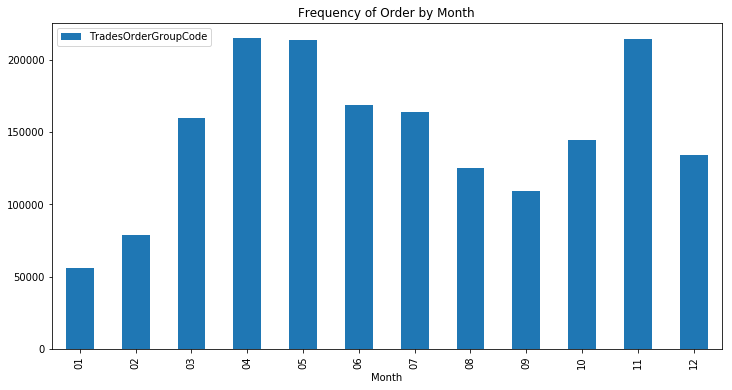

In [30]:
data.plot.bar(x='Month', figsize=(12,6), title="Frequency of Order by Month")

### ● 依星期分群

繪圖顯示星期二、三及周末的成功訂單量略高於其它日。

In [13]:
data = df2.groupby(by='Weekday')['TradesOrderGroupCode'].size().to_frame()
data.reset_index(level=0, inplace=True) # reset index so as to sort Weekday

weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

data.Weekday = pd.Categorical(data.Weekday, 
                      categories=weekday_order,
                      ordered=True)

data.sort_values('Weekday', inplace=True) # sort Weekdays
data = data.reset_index(drop=True)

data

,Weekday,TradesOrderGroupCode
0,Monday,241772
1,Tuesday,275469
2,Wednesday,269236
3,Thursday,238987
4,Friday,226362
5,Saturday,257878
6,Sunday,272467


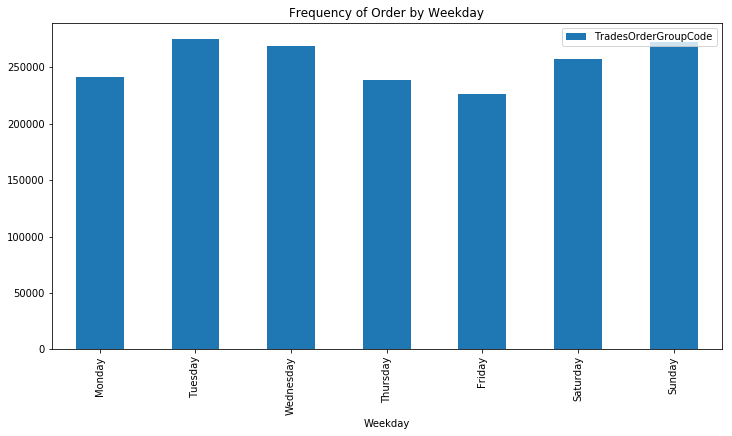

In [23]:
data.plot.bar(x='Weekday', figsize=(12,6), title="Frequency of Order by Weekday")

### ● 依小時分群

繪圖顯示成功訂單量高峰接近午夜。

In [31]:
data = df2.groupby(['Hour'])['TradesOrderGroupCode'].count().to_frame()
data = data.reset_index()
data

,Hour,TradesOrderGroupCode
0,00,115940
1,01,78198
2,02,48094
3,03,28979
4,04,18520
5,05,14726
6,06,19616
7,07,32050
8,08,47613
9,09,60984


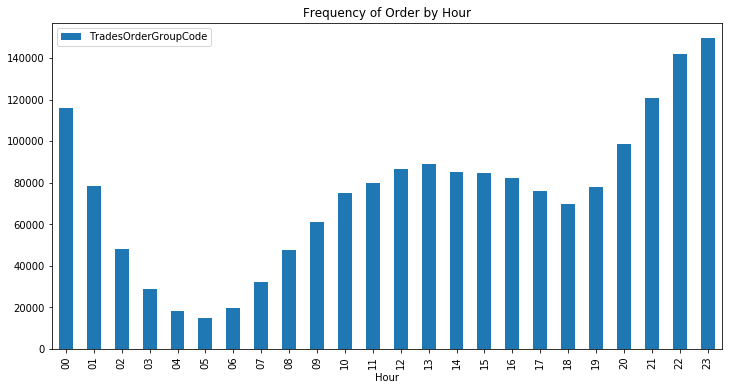

In [32]:
data.plot.bar(x='Hour', figsize=(12,6), title="Frequency of Order by Hour")